## JPM Institute Data Tests

#### Three Potential Data Issues That Can Be Identified From the Data:

###### 1. Missing Values
   - this can arise when some survey answers were not provided by the respondents
   - this can be tested by taking descriptive statistics to investigate the percentage of missing values 
     
###### 2. Unexpected Values Such as Negative When Non Negative Expected Such As Income
   - this can arise  when system generated numbers with special meaning are present in the data
   - this can arise when there are imputed values 
   - This type of issues can also be discovered by creating descriptive statistics of each column of the data, to get frequencies 
     for non-numerical values and minimum, maximum,average and standard deviations for numerical values
     
###### 3. Other Anomalies Due To Data Distribution Related Outliers:
   - Some column values may have extreme values
   - such extreme values can be tested by:
     - standardizing the numerical values and inspecting the distribution in the tails
     - by carrying out some statistical outlier tests:

Let's Revisit the Data: 
 The following R function takes one parameter: the column index in the analysis dataset and creates Cooks Outlier test Plot. The outliers can be seen as points far away from the main cluster of points.

Univariate Outlier Detection:
 - Testing separately if each column in the data has outliers, the more distant the values from the cluster of concentrated points the higher the likelihood that those the point(s) are outliers

In [7]:
%r

library(SparkR)

 df<-as.data.frame(sql("select * from jpmc_rse_assignment_data_csv"))


This function takes 2 parameters, a R data frame and the index of the column in the data frame to test for outlier.
so for example if we have univariate_outlier(df,3) we want to investigate the univariate outlier of the 3rd column in the R data frame. We use BoxPlot to show the outliers.

  - Benefits:
      * This test will be appropriate if there is no theoretical model between the columns
      * Can detect the time series specific outliers
      
  - Drawbacks:
      * If the variables have some sort of common theoretical factors then outlier may be more complex
      * Outliers could just be due to model specification

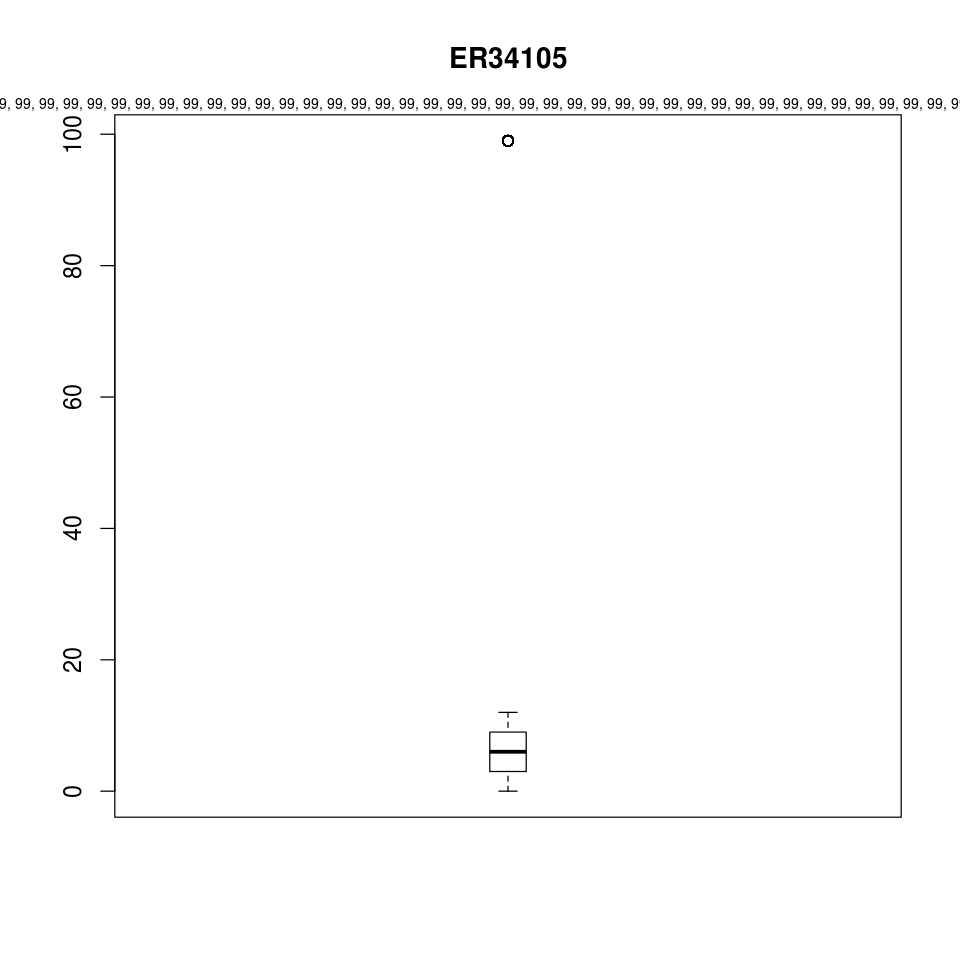

In [9]:
%r

univariate_outlier<-function(df,colid)
{
mydf<-df
outlier_values <- boxplot.stats(mydf[,names(mydf)[colid]])$out  # outlier values.
boxplot(mydf[,names(mydf)[colid]], main=names(mydf)[colid], boxwex=0.1)
mtext(paste("Outliers: ", paste(outlier_values, collapse=", ")), cex=0.6)
 }

univariate_outlier(df,8)

Multivariate Outlier Detection: Cooks Distance
  It computes the influence exerted by each data point (row) on the predicted outcome.


  - Benefits:
      * This test accounts for the fact that there is an expected interaction effect between all the features and the response variable so
        it use more information in the outlier detection decision
      * Can detect the feature(s) that caused the outlier in the residuals
      
  - Drawbacks:
      * There may not be a theoretical relationship between some for the features and the response variable
      * Outliers could just be due to model specification

  Here we are looking at more than one variables to detect the outliers, in this funnction the response variable has to be provided and the first stage is to get regression of that response variable over all the other variables in the data frame. Then use the residuals to build the Cooks test.
  
  In general use, those observations that have a cook’s distance greater than 4 times the mean may be classified as influential.
  
  The following function implements the Cooks test statistics on all the columns, the response column index must be provided along with the the R data frame.

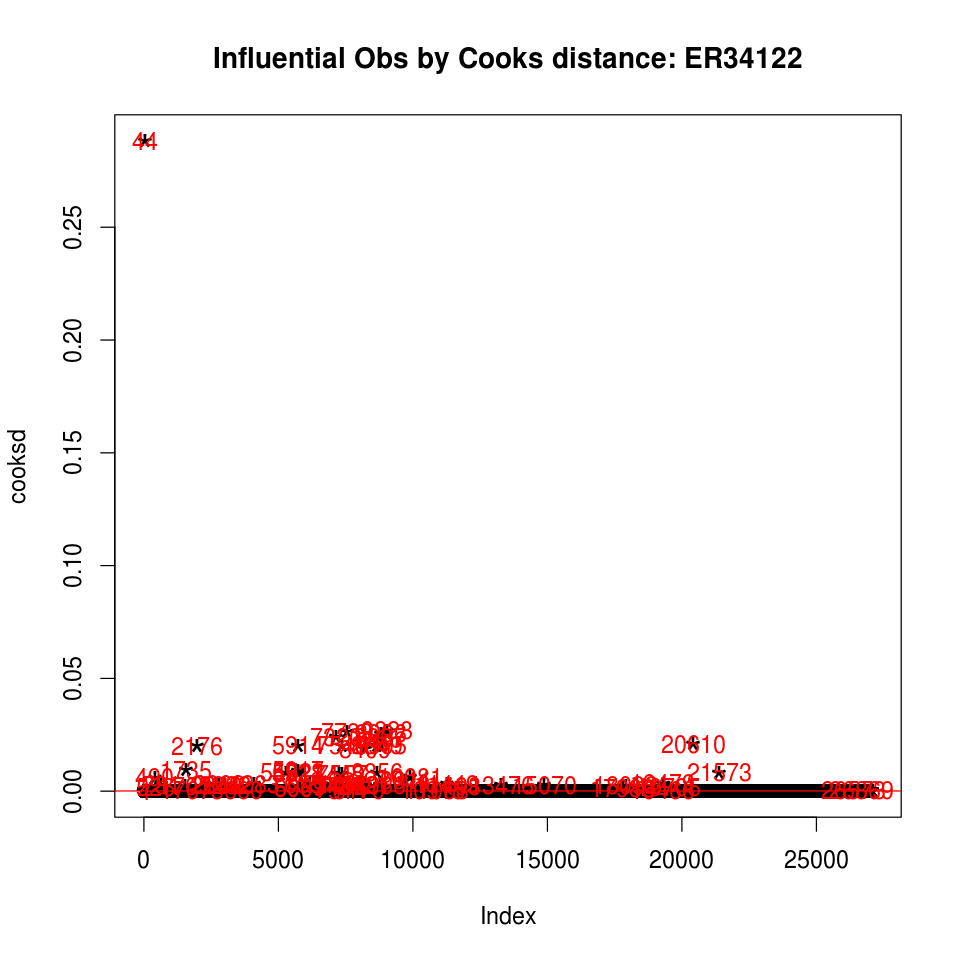

In [11]:
%r

test_cooks<-function(df,colid=3)
{
  mydf<-df
 colnam<- as.character(names(mydf)[colid])
  mod <- lm(mydf[,colnam] ~ ., data=mydf)
cooksd <- cooks.distance(mod)

plot(cooksd, pch="*", cex=2, main=paste( "Influential Obs by Cooks distance: ", colnam,sep="") )  # plot cook's distance
abline(h = 4*mean(cooksd, na.rm=T), col="red")  # add cutoff line
text(x=1:length(cooksd)+1, y=cooksd, labels=ifelse(cooksd>4*mean(cooksd, na.rm=T),names(cooksd),""), col="red")  
 } 

test_cooks(df,25)


#### Five Potential Data Issues That Cannot Be Identified From the Data:
      
##### 1. Human Data Entry Errors Not Relatede To The Issues Mentioned Above
   - In some situations, data entry operators may enter digits wrong but within the same magnitude: example 1122, 1212

##### 2. Sample Selection Problem:
   - Survey sample may be biased in some uncknown(to the survey designer) way
   - Only certain population have tendancy to respond survey while some other may try to avoid it

##### 3. Responders may be not be giving the correct information to fear of being deported for undocumented immigrants
   - An undocumented person may tend to not give accurate information or attempt to skip it

##### 4. Responders may not be willingly providing accurate income data for fear of paying more tax
   - Some responders may not be giving correct income information for fear of tax audit

##### 5. Responder may be giving misleading information or skipping survey altogether for some reasons
   - Some responders may be giving misleading information for some uncknown reasons